# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных

In [144]:
df = pd.read_csv('vgsales.csv')

### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

([<matplotlib.axis.XTick at 0x7ff333dca610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

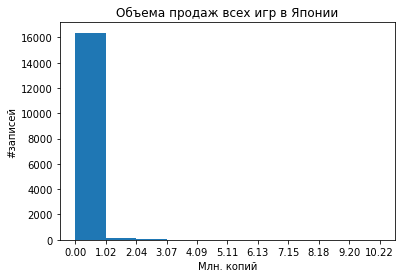

In [145]:
df_task_1 = df['JP_Sales']
plt.hist(df_task_1, bins=10)
plt.title('Объема продаж всех игр в Японии')
plt.xlabel('Млн. копий')
plt.ylabel('#записей')

list_year = ([df_task_1.max()/10 * val for val in range(11)])

plt.xticks(list_year)

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

Text(0, 0.5, 'Млн. копий')

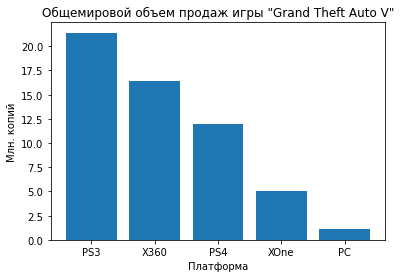

In [146]:
df_task_2 = df[df['Name'] == 'Grand Theft Auto V']

plt.bar(df_task_2['Platform'], df_task_2['Global_Sales'])
plt.title('Общемировой объем продаж игры "Grand Theft Auto V"')
plt.xlabel('Платформа')
plt.ylabel('Млн. копий')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

([<matplotlib.axis.XTick at 0x7ff333d0fbe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

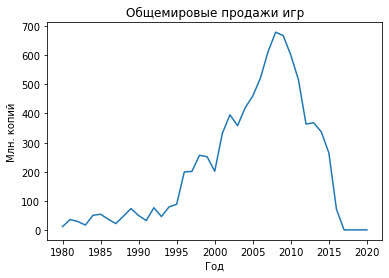

In [147]:
df_task_3 = df[['Year', 'Global_Sales']].groupby('Year').agg('sum')
df_task_3.index = df_task_3.index.astype('int64')
plt.plot(df_task_3)
plt.title('Общемировые продажи игр')
plt.xlabel('Год')
plt.ylabel('Млн. копий')

list_year = list(range(df_task_3.index.min(), df_task_3.index.max()+1, 5))
if df_task_3.index.max() not in list_year:
    list_year.append(df_task_3.index.max())

plt.xticks(list_year)

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

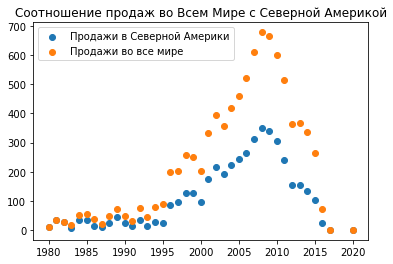

In [148]:
nf_sales = df[['Year', 'NA_Sales']].groupby('Year').agg('sum')
world_sales = df[['Year', 'Global_Sales']].groupby('Year').agg('sum')
plt.title('Соотношение продаж во Всем Мире с Северной Америкой')
plt.scatter(nf_sales.index, nf_sales['NA_Sales'], label='Продажи в Северной Америки')
plt.scatter(world_sales.index, world_sales['Global_Sales'], label='Продажи во все мире')
plt.legend()

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

Text(0.5, 1.0, 'Соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире')

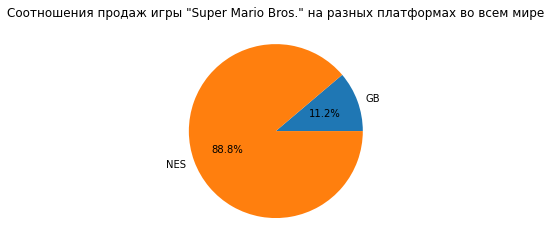

In [149]:
series = df[df['Name'] == 'Super Mario Bros.'].groupby('Platform').agg('sum')

plt.pie(series['Global_Sales'], labels=series.index, autopct='%1.1f%%')
plt.title('Соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире')

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

Text(0, 0.5, 'Млн. копий')

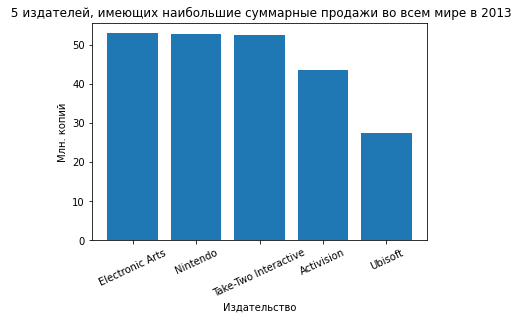

In [150]:
df_task_06 = df[df['Year'] == 2013][['Global_Sales', 'Publisher']]
df_task_06 = df_task_06.groupby('Publisher').agg('sum').sort_values('Global_Sales', ascending=False)
df_task_06 = df_task_06[:5]

plt.bar(df_task_06.index, df_task_06['Global_Sales'])
plt.title(' 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013')
plt.xticks(rotation=25)
plt.xlabel('Издательство')
plt.ylabel('Млн. копий')

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

([<matplotlib.axis.XTick at 0x7ff3491f6910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

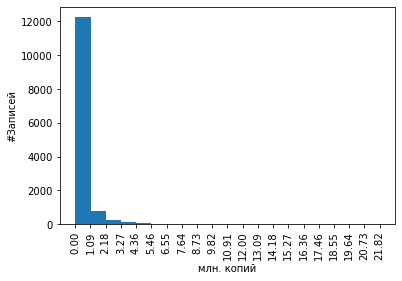

In [151]:
df_task_07 = df[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2000) & (df['Year'] <= 2015)]

cnt_column = 20
plt.hist(df_task_07['Global_Sales'], bins=cnt_column)
plt.xlabel('млн. копий')
plt.ylabel('#Записей')

interval = df_task_07['Global_Sales'].max()/cnt_column

list_year = list([interval * val for val in range(cnt_column+1)])

plt.xticks(list_year, rotation=90)

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

([<matplotlib.axis.XTick at 0x7ff333676c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

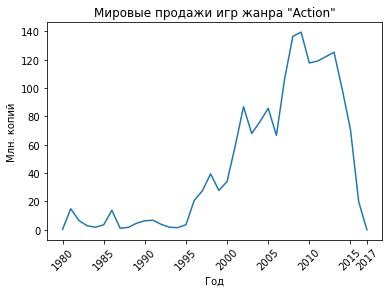

In [152]:
df_task_8 = df[df['Genre'] == 'Action'].groupby('Year').agg('sum')['Global_Sales']

plt.plot(df_task_8)
plt.title('Мировые продажи игр жанра "Action"')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
year_labels = [val for val in range(int(df_task_8.index.min()), int(df_task_8.index.max()),5)]
year_labels.append(df_task_8.index.max())
plt.xticks(year_labels, rotation=45)

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

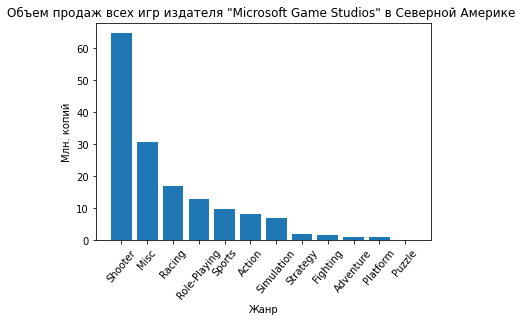

In [153]:
df_task_09 = df[(df['Publisher'] == 'Microsoft Game Studios')]
df_task_09 = df_task_09.groupby('Genre').agg('sum')
df_task_09.sort_values('NA_Sales', ascending=False, inplace=True)

plt.bar(df_task_09.index, df_task_09['NA_Sales'])
plt.title('Объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке ')
plt.xlabel('Жанр')
plt.ylabel('Млн. копий')
plt.xticks(rotation=50)

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

Text(0.5, 1.0, 'Процент ошибок записей в сумме Global_Sales')

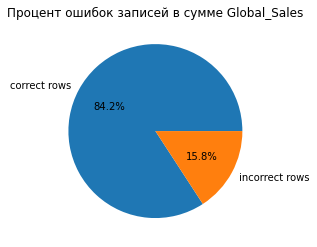

In [154]:
import numpy as np

df_task_10 = df
df_task_10['sum_correct'] = np.sum(df_task_10[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']], 
                                   axis=1)

df_task_10['type_row'] = np.where(
                          np.abs(df_task_10['sum_correct']-df_task_10['Global_Sales'])>0.01, 
                                 'incorrect rows', 'correct rows')

df_task_10 = df_task_10.groupby('type_row').agg('count')['Rank']

plt.pie(df_task_10, labels=df_task_10.index, autopct='%1.1f%%')
plt.title('Процент ошибок записей в сумме Global_Sales')